## 일본 여행 데이터 분석

주제> 일본여행 관련 여행사 패키지 상품의 키워드와 실제 일본 여행후기 키워드와 얼마나 일치하는가?

1. 일본 여행후기의 데이터 수집
  - 네이버 블로그 내용 수집 [제목|내용]
 
2. 여행사 패키지 상품 데이터 수집
  - 유명 여행사 일본여행 상품 패키지 내용 수집 [패키지명]

3. 여행후기 데이터와 여행사 데이터의 내용 중에 명사 키워드 추출

4. 추출된 명사 키워드 간의 비교 분석 시각화 표현[워드 클라우드]

In [1]:
import requests

In [2]:
import csv

In [3]:
import lxml.html

In [4]:
products = []

# 네이버 쇼핑("일본여행") 리스트 제목 추출
base_url = 'http://shopping.naver.com/search/all_search.nhn?query=%EC%9D%BC%EB%B3%B8%EC%97%AC%ED%96%89&'
board_url = '&pagingSize=40&productSet=total&viewType=list&sort=rel&frm=NVSHPAG&sps=N'

for page in range(1, 50):
    page_url = base_url + '&pagingIndex={}'.format(page) + board_url
    res = requests.get(page_url)
    element = lxml.html.fromstring(res.text)
    for e in element.xpath('.//div[@class="info"]'):
        title = e.find('.//a[@class="tit"]').text_content()
        products.append([title])

In [5]:
len(products)

1960

In [6]:
with open('shopping_Naver.csv', 'w', encoding='utf8') as f: #네이버 쇼핑 리스트 파일 저장하기
    w = csv.writer(f)
    w.writerow(['title'])
    w.writerows(products)

In [7]:
with open('shopping_Naver.csv', encoding='utf8') as f: #네이버 쇼핑 리스트 파일 불러오기
    words = f.read().splitlines()

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
from konlpy.tag import Kkma

In [10]:
tagger = Kkma()

In [11]:
def get_word(text):
    nouns = tagger.nouns(text)
    return [noun for noun in nouns if len(noun) > 1]

In [12]:
cv = CountVectorizer(tokenizer=get_word, max_features=50)

In [13]:
tdf = cv.fit_transform(words)

In [14]:
tdf

<3922x50 sparse matrix of type '<class 'numpy.int64'>'
	with 25693 stored elements in Compressed Sparse Row format>

In [15]:
words = cv.get_feature_names()

In [16]:
import numpy

In [17]:
from operator import itemgetter

In [18]:
count_mat = tdf.sum(axis=0)

In [19]:
count = numpy.squeeze(numpy.asarray(count_mat))

In [20]:
count

array([ 350, 1047,  327,  453,  375,  385,  366,  848,  746,  196,  791,
        147,  171,  319,  319,  621,  618,  345,  285,  673,  615,  223,
       1771,  137,  280,  340,  168,  589,  144, 1863, 1123,  228,  144,
        385,  286,  207, 1041,  683,  157,  169,  347,  165, 1545,  835,
        305,  217,  717,  376,  631,  621], dtype=int64)

In [21]:
word_count = list(zip(words, count)) ##Naver쇼핑 내 추출한 명사와 카운트

In [22]:
sort_word_count = sorted(word_count, key=itemgetter(1), reverse=True)[:20] ##정렬해서 저장

In [23]:
sort_word_count

[('일본', 1863),
 ('여행', 1771),
 ('패키지', 1545),
 ('일본여행', 1123),
 ('3박4일', 1047),
 ('추천', 1041),
 ('가족', 848),
 ('패키지여행', 835),
 ('관광', 791),
 ('가족여행', 746),
 ('항공', 717),
 ('출발', 683),
 ('삿포로', 673),
 ('효도', 631),
 ('부모님', 621),
 ('효도관광', 621),
 ('부모님여행', 618),
 ('삿포로패키지', 615),
 ('온천', 589),
 ('4일', 453)]

In [24]:
final1 = sort_word_count[4:] ##일본여행 단어는 목표주제이기에 제외

In [25]:
%matplotlib inline

In [26]:
from wordcloud import WordCloud

In [27]:
from matplotlib import pyplot

In [28]:
wc = WordCloud(font_path='C:\\Windows\\Fonts\\malgun.ttf', background_color='white', width=400, height=300)
cloud = wc.generate_from_frequencies(final1)

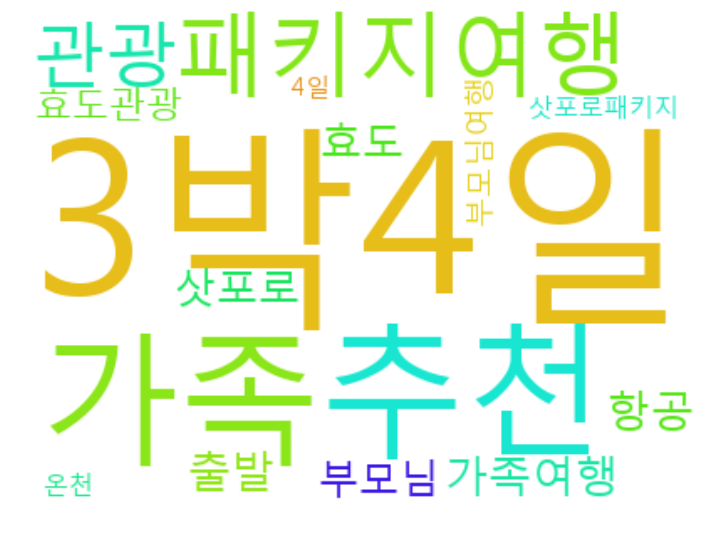

In [29]:
pyplot.figure(figsize=(12, 9))
pyplot.imshow(cloud)
pyplot.axis("off")
pyplot.show()

In [30]:
with open('travel_data.csv', encoding='cp949') as f: ##블로그 데이터 불러오기
    travel_data = f.read().splitlines()

In [31]:
tdf2 = cv.fit_transform(travel_data)

In [32]:
words2 = cv.get_feature_names()

In [33]:
count_mat = tdf2.sum(axis=0)

In [34]:
count2 = numpy.squeeze(numpy.asarray(count_mat))

In [35]:
word_count2 = list(zip(words2, count2)) ##Naver블로그 내 추출한 명사와 카운트

In [36]:
sort_word_count2 = sorted(word_count2, key=itemgetter(1), reverse=True)[:20] ##정렬

In [37]:
sort_word_count2

[('일본', 55),
 ('여행', 54),
 ('일본여행', 45),
 ('우리', 36),
 ('후기', 36),
 ('시간', 33),
 ('하나', 29),
 ('생각', 28),
 ('정도', 28),
 ('사진', 27),
 ('다음', 22),
 ('도착', 22),
 ('여기', 21),
 ('가격', 20),
 ('나라', 20),
 ('사람', 20),
 ('도쿄', 19),
 ('처음', 19),
 ('거리', 18),
 ('이것', 18)]

In [42]:
final2 = sort_word_count2[5:] ##일본여행과 우리, 후기 라는 단어 제외하기

In [43]:
wc2 = WordCloud(font_path='C:\\Windows\\Fonts\\malgun.ttf', background_color='black', width=400, height=300)
cloud = wc2.generate_from_frequencies(final2)

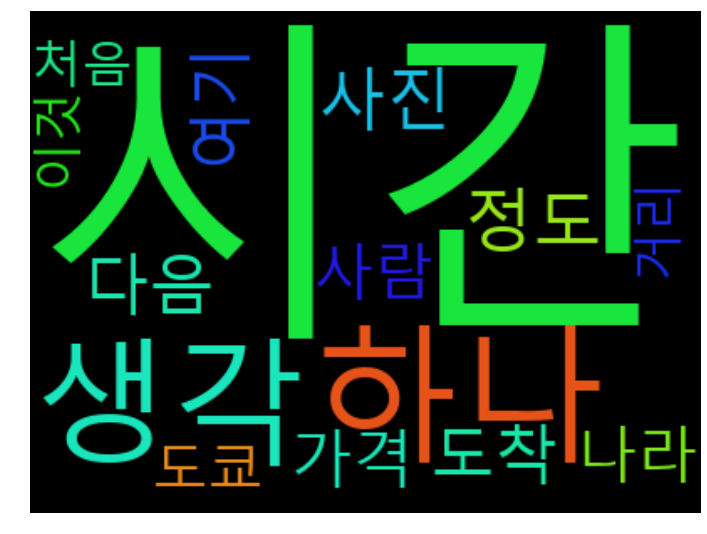

In [44]:
pyplot.figure(figsize=(12, 9))
pyplot.imshow(cloud)
pyplot.axis("off")
pyplot.show()

결과분석> 
쇼핑 리스트는 3박4일, 가족, 부모님, 온천, 효도관광 등의 패키지 상품 키워드가 주류이며 
여행사는 주 판매 대상이 본인(소수)이 아닌 부모를 위한 여행 선물에 초점을 맞추고 있음을 알 수 있으며
데이터 수집 시기가 여름이여서 가장 인기 관광지로 삿포로가 추천되어 나오고 있습니다. 
블로그 후기는 시간, 생각, 사진, 가격, 도착 등 자신의 여행플랜에 관한 키워드들로 이루어져 있으며,
주요 관광지는 도쿄로 나오는데 블로그 데이터 수집기간이 대부분 봄이여서 봄에 도쿄를 많이 다녀온다는 것을 알 수 있습니다.